In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score


In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
diabetes_data_clean = diabetes_data.dropna()


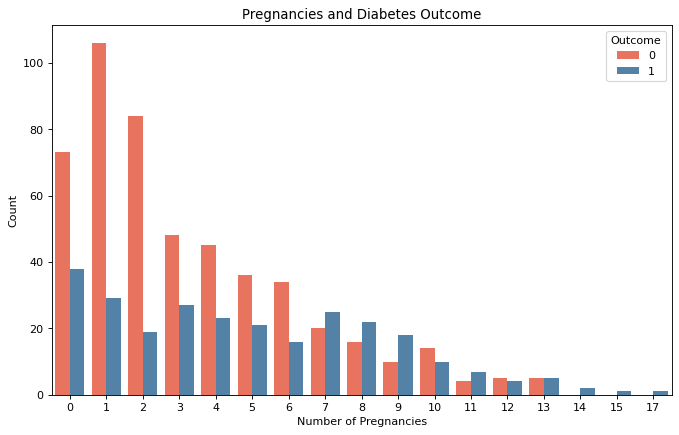

In [4]:
data = diabetes_data_clean[['Outcome', 'Pregnancies']]
grouped_data = data.groupby(['Outcome', 'Pregnancies']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.barplot(x='Pregnancies', y='Counts', hue='Outcome', data=grouped_data, palette=['#FF6347', '#4682B4'])
ax.set_title('Pregnancies and Diabetes Outcome')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Pregnancies')
plt.show()

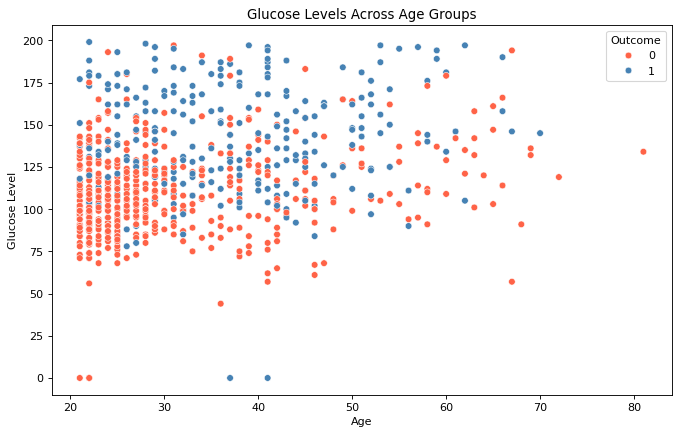

In [5]:
plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_data_clean, palette=['#FF6347', '#4682B4'])
plt.title('Glucose Levels Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

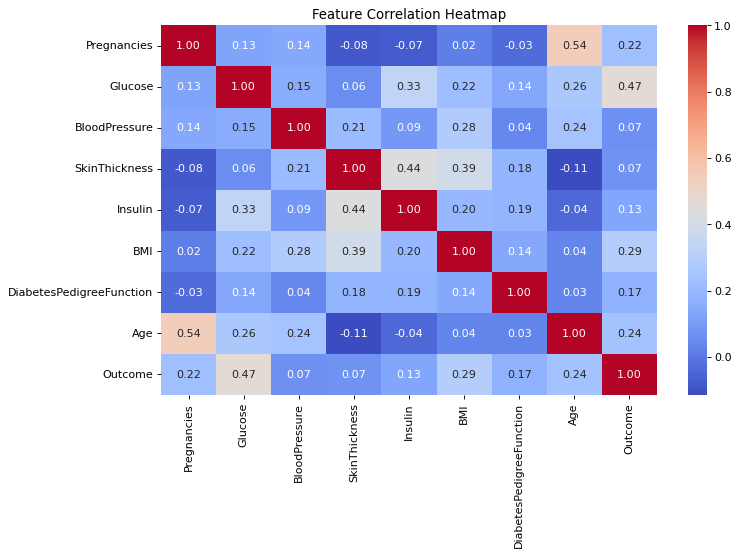

In [6]:
plt.figure(figsize=(10, 6), dpi=80)
sns.heatmap(diabetes_data_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:
X = diabetes_data_clean.drop(columns=['Outcome'])
y = diabetes_data_clean['Outcome']


In [8]:
# imputer = SimpleImputer(strategy='mean')
# X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [9]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


In [11]:
dcs = DecisionTreeClassifier()
dcs.fit(X_train, y_train)


DecisionTreeClassifier()

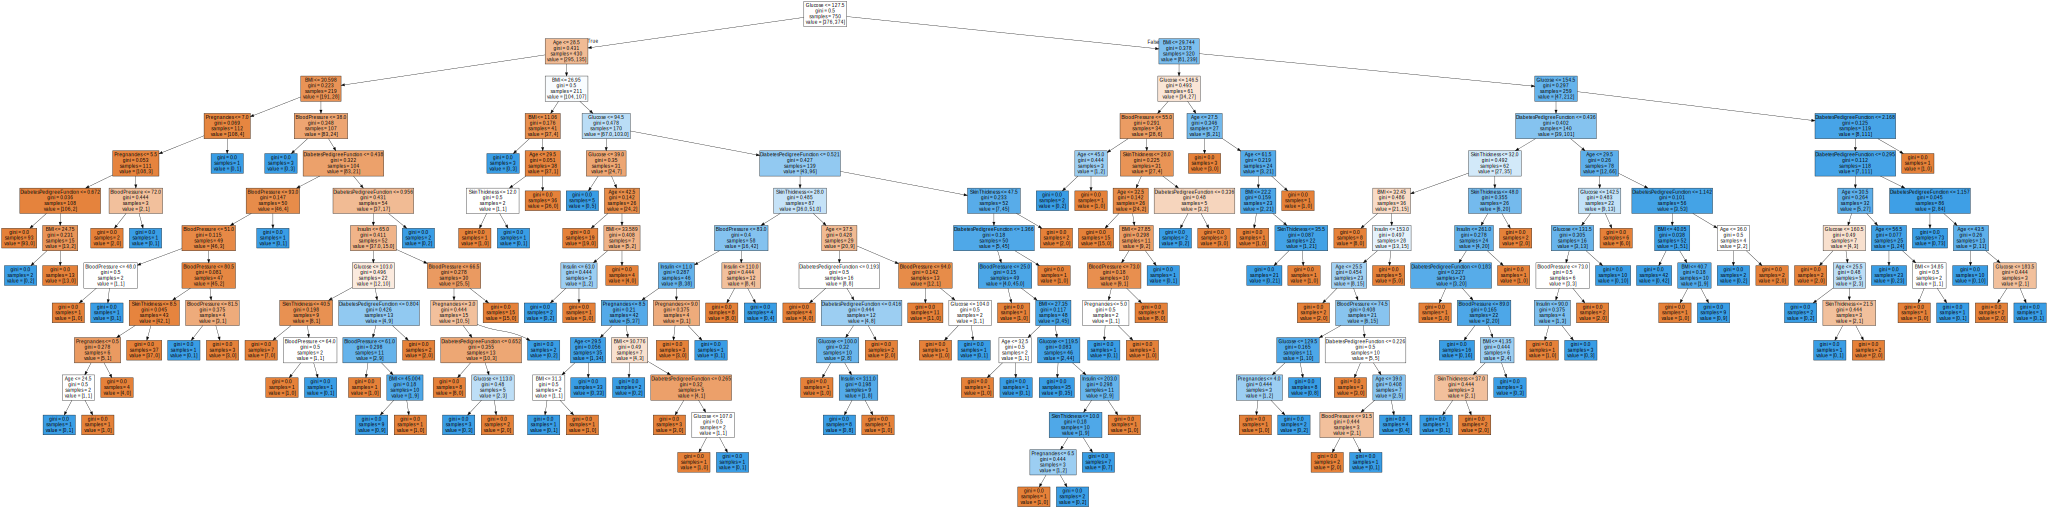

In [12]:
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=X_train.columns)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#dump(dcs, 'diabetes_decision_tree_model.joblib')

In [13]:
loaded_model = load('diabetes_decision_tree_model.joblib')
y_pred = loaded_model.predict(X_test)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')


Accuracy: 72.40%
Precision: 72.64%
